## Mask R-CNN - Train doses dataset


In [ ]:
#!python -m pip install --user --upgrade tensorflow==1.15.0

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import skimage.io
import sys
from skimage.io import imread
from pathlib import Path

DATASET= # TODO put a path to your dataset

# Data Path
TRAIN_PATH = DATASET + 'stage1_train/'
VALIDATION_PATH = DATASET + 'stage1_val/'
TEST_PATH = DATASET + 'stage1_test/'

# Get train and test IDs
train_ids = next(os.walk(TRAIN_PATH))[1]
val_ids = next(os.walk(VALIDATION_PATH))[1]
test_ids = next(os.walk(TEST_PATH))[1]

ROOT_DIR = os.getcwd()

# ROOT_DIR = os.path.dirname(os.path.dirname(ROOT_DIR))

# Import Mask RCNN
sys.path.append(ROOT_DIR)

from mrcnn import utils
from mrcnn import visualize
from mrcnn.config import Config
from mrcnn import model as modellib
from mrcnn.model import log


%matplotlib inline 

# Root directory of the project
ROOT_DIR = os.getcwd()

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")

# # Download COCO trained weights from Releases if needed
# if not os.path.exists(COCO_MODEL_PATH):
#     utils.download_trained_weights(COCO_MODEL_PATH)

Root DIR =/home/ekot/notebooks/Mask_RCNN/samples/nucleus


## Configurations

In [28]:
class DosesConfig(Config):        
    # Give the configuration a recognizable name
    NAME = "doses"
    
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    
    # Number of classes (including background)
    NUM_CLASSES = 1 + 18  # background + 18 doses

    # Use smaller anchors because our image and objects are small
    RPN_ANCHOR_SCALES = (8, 16, 64, 128, 256)  # anchor side in pixels

    # Aim to allow ROI sampling to pick 33% positive ROIs.
    TRAIN_ROIS_PER_IMAGE = 32

    # set number of epoch
    STEPS_PER_EPOCH = 30

    # Minimum probability value to accept a detected instance
    # ROIs below this threshold are skipped
    DETECTION_MIN_CONFIDENCE = 0.3

    # Non-maximum suppression threshold for detection
    DETECTION_NMS_THRESHOLD = 0.1
    
    # set validation steps 
    VALIDATION_STEPS = 5
    
    # Backbone network architecture
    # Supported values are: resnet50, resnet101
    BACKBONE = "resnet50"

    # Input image resizing
    # Random crops of size 512x512
    IMAGE_RESIZE_MODE = "square"

    IMAGE_CHANNEL_COUNT = 1
    MEAN_PIXEL = np.array([128])
    
    USE_MINI_MASK = False
    MINI_MASK_SHAPE = (56, 56)  # (height, width) of the mini-mask


config = DosesConfig()
config.display()


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.3
DETECTION_NMS_THRESHOLD        0.1
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            1
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                31
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    1]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE          

## Notebook Preferences

In [2]:
def get_ax(rows=1, cols=1, size=8):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Change the default size attribute to control the size
    of rendered images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

## Dataset

In [29]:

class DosesDataset(utils.Dataset):
    
    def load_doses(self, mode):
        self.add_class("doses", 1, "1")
        self.add_class("doses", 2, "2")
        self.add_class("doses", 3, "3")
        self.add_class("doses", 4, "4")
        self.add_class("doses", 5, "5")
        self.add_class("doses", 6, "6")
        self.add_class("doses", 7, "7")
        self.add_class("doses", 8, "8")
        self.add_class("doses", 9, "9")
        self.add_class("doses", 10, "10")
        self.add_class("doses", 11, "11")
        self.add_class("doses", 12, "12")
        self.add_class("doses", 13, "13")
        self.add_class("doses", 14, "14")
        self.add_class("doses", 15, "15")
        self.add_class("doses", 16, "16")
        self.add_class("doses", 17, "17")
        self.add_class("doses", 18, "18")


        if mode == "train":
            for image_id in train_ids:
                self.add_image(
                    "doses",
                    image_id=image_id,
                    path=os.path.join(TRAIN_PATH, image_id, "images/{}.png".format(image_id)),
                    mask_path=os.path.join(TRAIN_PATH, image_id, "masks/{}.png".format(image_id)),
#                     width=230, height=140)
                )
              
        if mode == "val":   
            for image_id in val_ids:
                self.add_image(
                    "doses",
                    image_id=image_id,
                    path=os.path.join(VALIDATION_PATH, image_id, "images/{}.png".format(image_id)),
                    mask_path=os.path.join(VALIDATION_PATH, image_id, "masks/{}.png".format(image_id)),
#                     width=230, height=140)
                )
        if mode == "test":
            for image_id in test_ids:
                self.add_image(
                    "doses",
                    image_id=image_id,
                    path=os.path.join(TEST_PATH, image_id, "images/{}.png".format(image_id)),
                            mask_path=os.path.join(TEST_PATH, image_id, "masks/{}.png".format(image_id)),
        #                     width=230, height=140)
                )




    def load_image(self, image_id):
        info = self.image_info[image_id]
        info = info.get("id")

        train_mode = TRAIN_PATH + info
        val_mode = VALIDATION_PATH + info
        test_mode = TEST_PATH + info

        if Path(train_mode).exists():
            path = train_mode
        elif Path(val_mode).exists():
            path = val_mode
        else:
            path = test_mode

        img_file_dir = path + '/images/' + info + '.png'
        img = imread(img_file_dir, 0)
#         img = resize(img, (config.IMAGE_SHAPE[0], config.IMAGE_SHAPE[1]), mode='constant', preserve_range=True)
        img = np.expand_dims(img, axis=-1)
        return img


    def image_reference(self, image_id):
        """Return the shapes data of the image."""
        info = self.image_info[image_id]
        if info["source"] == "shapes":
            return info["shapes"]
        else:
            super(self.__class__).image_reference(self, image_id)

    def load_mask(self, image_id):
        # get details of image
        mask_container=[]
        info = self.image_info[image_id]       
        # Get mask directory from image path
        mask_dir = os.path.join(os.path.dirname(os.path.dirname(info['path'])), "masks")        
        class_ids = []

        # Read mask files from .png image
        mask = []
        for f in next(os.walk(mask_dir))[2]:
            if f.endswith(".png"):
                kot = f.split("_")[-1].split(".")[0]
                mask_container.append(kot)
                m = skimage.io.imread(os.path.join(mask_dir, f)).astype(np.bool)
                mask.append(m)
                class_ids.append(self.class_names.index(str(kot)))
                
        mask = np.stack(mask, axis=-1)
        assert len(mask_container) == 18
        
        return mask.astype(np.bool), np.asarray(class_ids, dtype=np.int32)
         


In [4]:
# Training dataset
dataset_train = DosesDataset()
dataset_train.load_doses("train")
dataset_train.prepare()

# Validation dataset
dataset_val = DosesDataset()
dataset_val.load_doses("val")
dataset_val.prepare()


# Test dataset
dataset_test = DosesDataset()
dataset_test.load_doses("test")
dataset_test.prepare()

In [5]:
print("Image Count: {}".format(len(dataset_train.image_ids)))
print("Class Count: {}".format(dataset_train.num_classes))
for i, info in enumerate(dataset_train.class_info):
    print("{:3}. {:50}".format(i, info['name']))

Image Count: 1355
Class Count: 19
  0. 0                                                 
  1. 1                                                 
  2. 2                                                 
  3. 3                                                 
  4. 4                                                 
  5. 5                                                 
  6. 6                                                 
  7. 7                                                 
  8. 8                                                 
  9. 9                                                 
 10. 10                                                
 11. 11                                                
 12. 12                                                
 13. 13                                                
 14. 14                                                
 15. 15                                                
 16. 16                                                
 17. 17       

In [6]:
print("Image Count: {}".format(len(dataset_val.image_ids)))
print("Class Count: {}".format(dataset_val.num_classes))
for i, info in enumerate(dataset_val.class_info):
    print("{:3}. {:50}".format(i, info['name']))

Image Count: 154
Class Count: 19
  0. 0                                                 
  1. 1                                                 
  2. 2                                                 
  3. 3                                                 
  4. 4                                                 
  5. 5                                                 
  6. 6                                                 
  7. 7                                                 
  8. 8                                                 
  9. 9                                                 
 10. 10                                                
 11. 11                                                
 12. 12                                                
 13. 13                                                
 14. 14                                                
 15. 15                                                
 16. 16                                                
 17. 17        

In [7]:
print("Image Count: {}".format(len(dataset_test.image_ids)))
print("Class Count: {}".format(dataset_test.num_classes))
for i, info in enumerate(dataset_test.class_info):
    print("{:3}. {:50}".format(i, info['name']))

Image Count: 178
Class Count: 19
  0. 0                                                 
  1. 1                                                 
  2. 2                                                 
  3. 3                                                 
  4. 4                                                 
  5. 5                                                 
  6. 6                                                 
  7. 7                                                 
  8. 8                                                 
  9. 9                                                 
 10. 10                                                
 11. 11                                                
 12. 12                                                
 13. 13                                                
 14. 14                                                
 15. 15                                                
 16. 16                                                
 17. 17        

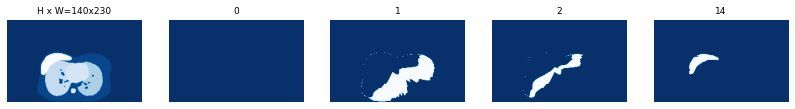

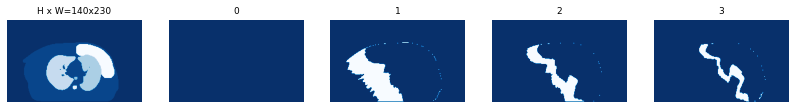

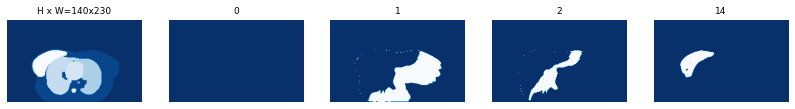

In [24]:
# Load and display random samples
image_ids = np.random.choice(dataset_train.image_ids, 3)
for image_id in image_ids:
    image = dataset_train.load_image(image_id)
    mask, class_ids = dataset_train.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)

## Create Model

In [30]:
# Create model in training mode
model = modellib.MaskRCNN(mode="training", config=config, model_dir=MODEL_DIR)






Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead


In [52]:
init_with = "coco"  # imagenet, coco, or last

if init_with == "imagenet":
    model.load_weights(model.get_imagenet_weights(), by_name=True)
elif init_with == "coco":
    model.load_weights(COCO_MODEL_PATH, by_name=True,
                       exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", "mrcnn_bbox", "mrcnn_mask", "conv1"]) # images are in grayscale so adding here first layer
elif init_with == "last":
    model.load_weights(model.find_last()[1], by_name=True)

## Training

Train in two stages:
1. Only the heads. Here we're freezing all the backbone layers and training only the randomly initialized layers (i.e. the ones that we didn't use pre-trained weights from MS COCO). To train only the head layers, pass `layers='heads'` to the `train()` function.

2. Fine-tune all layers. For this simple example it's not necessary, but we're including it to show the process. Simply pass `layers="all` to train all layers.

In [53]:
model.train(dataset_train, dataset_val,
            learning_rate=config.LEARNING_RATE, 
            epochs=100, #500
            layers="heads") #layers all from head


Starting at epoch 0. LR=0.001

Checkpoint Path: /home/ekot/notebooks/Mask_RCNN/samples/nucleus/logs/doses20210201T1029/mask_rcnn_doses_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (Time

/home/ekot/.local/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/ekot/.local/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/ekot/.local/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/ekot/.local/lib/python3.7/site-packages/keras/engine/training.py:1987: UserWarning: Using a gener

Epoch 1/100
29/30 [============================>.] - ETA: 3s - loss: 6.8650 - rpn_class_loss: 0.6069 - rpn_bbox_loss: 3.1783 - mrcnn_class_loss: 1.6550 - mrcnn_bbox_loss: 0.7786 - mrcnn_mask_loss: 0.6462

/home/ekot/.local/lib/python3.7/site-packages/keras/engine/training.py:2142: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


30/30 [==============================] - 456s - loss: 6.8268 - rpn_class_loss: 0.5910 - rpn_bbox_loss: 3.1708 - mrcnn_class_loss: 1.6498 - mrcnn_bbox_loss: 0.7732 - mrcnn_mask_loss: 0.6421 - val_loss: 5.9713 - val_rpn_class_loss: 0.1256 - val_rpn_bbox_loss: 3.1651 - val_mrcnn_class_loss: 1.3641 - val_mrcnn_bbox_loss: 0.7523 - val_mrcnn_mask_loss: 0.5641
Epoch 2/100
30/30 [==============================] - 116s - loss: 5.0995 - rpn_class_loss: 0.0788 - rpn_bbox_loss: 2.8902 - mrcnn_class_loss: 1.0342 - mrcnn_bbox_loss: 0.6276 - mrcnn_mask_loss: 0.4687 - val_loss: 4.7976 - val_rpn_class_loss: 0.0547 - val_rpn_bbox_loss: 3.0927 - val_mrcnn_class_loss: 0.8553 - val_mrcnn_bbox_loss: 0.4647 - val_mrcnn_mask_loss: 0.3302
Epoch 3/100
30/30 [==============================] - 116s - loss: 4.3825 - rpn_class_loss: 0.0565 - rpn_bbox_loss: 2.7419 - mrcnn_class_loss: 0.8191 - mrcnn_bbox_loss: 0.4608 - mrcnn_mask_loss: 0.3042 - val_loss: 4.0414 - val_rpn_class_loss: 0.0543 - val_rpn_bbox_loss: 2.1991

30/30 [==============================] - 120s - loss: 3.4725 - rpn_class_loss: 0.0461 - rpn_bbox_loss: 1.8467 - mrcnn_class_loss: 0.7705 - mrcnn_bbox_loss: 0.4706 - mrcnn_mask_loss: 0.3386 - val_loss: 3.0128 - val_rpn_class_loss: 0.0471 - val_rpn_bbox_loss: 1.5158 - val_mrcnn_class_loss: 0.8353 - val_mrcnn_bbox_loss: 0.3413 - val_mrcnn_mask_loss: 0.2732
Epoch 46/100
30/30 [==============================] - 120s - loss: 3.3964 - rpn_class_loss: 0.0347 - rpn_bbox_loss: 1.7690 - mrcnn_class_loss: 0.7544 - mrcnn_bbox_loss: 0.4672 - mrcnn_mask_loss: 0.3712 - val_loss: 3.9638 - val_rpn_class_loss: 0.0451 - val_rpn_bbox_loss: 2.1012 - val_mrcnn_class_loss: 0.9311 - val_mrcnn_bbox_loss: 0.5002 - val_mrcnn_mask_loss: 0.3862
Epoch 47/100
30/30 [==============================] - 120s - loss: 3.3731 - rpn_class_loss: 0.0353 - rpn_bbox_loss: 1.7069 - mrcnn_class_loss: 0.8603 - mrcnn_bbox_loss: 0.4425 - mrcnn_mask_loss: 0.3281 - val_loss: 2.8337 - val_rpn_class_loss: 0.0413 - val_rpn_bbox_loss: 1.58

30/30 [==============================] - 115s - loss: 3.4733 - rpn_class_loss: 0.0412 - rpn_bbox_loss: 1.9090 - mrcnn_class_loss: 0.7869 - mrcnn_bbox_loss: 0.4198 - mrcnn_mask_loss: 0.3162 - val_loss: 3.5832 - val_rpn_class_loss: 0.0407 - val_rpn_bbox_loss: 1.5782 - val_mrcnn_class_loss: 0.9477 - val_mrcnn_bbox_loss: 0.5262 - val_mrcnn_mask_loss: 0.4904
Epoch 90/100
30/30 [==============================] - 115s - loss: 3.4767 - rpn_class_loss: 0.0301 - rpn_bbox_loss: 1.6855 - mrcnn_class_loss: 0.9444 - mrcnn_bbox_loss: 0.4638 - mrcnn_mask_loss: 0.3530 - val_loss: 3.3508 - val_rpn_class_loss: 0.0189 - val_rpn_bbox_loss: 1.6114 - val_mrcnn_class_loss: 0.8145 - val_mrcnn_bbox_loss: 0.4597 - val_mrcnn_mask_loss: 0.4464
Epoch 91/100
30/30 [==============================] - 115s - loss: 3.2967 - rpn_class_loss: 0.0328 - rpn_bbox_loss: 1.8215 - mrcnn_class_loss: 0.7708 - mrcnn_bbox_loss: 0.3639 - mrcnn_mask_loss: 0.3077 - val_loss: 2.9323 - val_rpn_class_loss: 0.0360 - val_rpn_bbox_loss: 1.71

In [56]:
model.train(dataset_train, dataset_val,
            learning_rate=config.LEARNING_RATE / 10,
            epochs=1,
            layers="all")


Starting at epoch 100. LR=0.0001

Checkpoint Path: /home/ekot/notebooks/Mask_RCNN/samples/nucleus/logs/doses20210201T1029/mask_rcnn_doses_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch2a          (BatchNorm)
res3a_branch2b  

/home/ekot/.local/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/ekot/.local/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/ekot/.local/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/ekot/.local/lib/python3.7/site-packages/keras/engine/training.py:1987: UserWarning: Using a gener

In [55]:
model_path = os.path.join(MODEL_DIR, "mask_rcnn_ep_500_heads.h5")
model.keras_model.save_weights(model_path)

## Detection

In [31]:
class InferenceConfig(DosesConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

model = modellib.MaskRCNN(mode="inference",
                          config=inference_config,
                          model_dir=MODEL_DIR)




Instructions for updating:
Use `tf.cast` instead.


In [33]:
model_path = model.find_last()

# Load trained weights (fill in path to trained weights here)
assert model_path != "", "Provide path to trained weights"
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

Loading weights from  /home/ekot/notebooks/Mask_RCNN/samples/nucleus/logs/doses20210201T1029/mask_rcnn_doses_0099.h5





Re-starting from epoch 99


## Evaluation

Original image shape:  [140 230   1]
Processing 1 images
image                    shape: (1024, 1024, 1)       min:    0.00000  max:   11.00000  uint8
molded_images            shape: (1, 1024, 1024, 1)    min:    0.00000  max:   11.00000  uint8
image_metas              shape: (1, 31)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.17695  max:    1.11439  float32
gt_class_id              shape: (18,)                 min:    0.00000  max:   17.00000  int32
gt_bbox                  shape: (18, 4)               min:    0.00000  max: 1024.00000  int32
gt_mask                  shape: (1024, 1024, 18)      min:    0.00000  max:    1.00000  bool
Number of instances N = 21
(1024, 1024, 1)


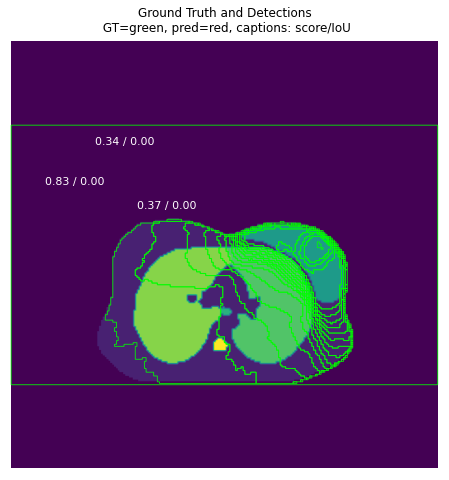

In [66]:
image_id = random.choice(dataset_test.image_ids)
info = dataset_test.image_info[image_id]

image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset_test, inference_config, image_id, use_mini_mask=False)

info = dataset_test.image_info[image_id]

print("Original image shape: ", modellib.parse_image_meta(image_meta[np.newaxis,...])["original_image_shape"][0])

# Run object detection
results = model.detect_molded(np.expand_dims(image, 0), np.expand_dims(image_meta, 0), verbose=1)

# Display results
r = results[0]
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

# Compute AP over range 0.5 to 0.95 and print it
# utils.compute_ap_range(gt_bbox, gt_class_id, gt_mask,
#                        r['rois'], r['class_ids'], r['scores'], r['masks'],
#                        verbose=1)

visualize.display_differences(
    image,
    gt_bbox, gt_class_id, gt_mask,
    r['rois'], r['class_ids'], r['scores'], r['masks'],
    dataset_test.class_names, ax=get_ax(),
    show_box=False, show_mask=False,
    iou_threshold=0.5, score_threshold=0.5)

300
{'id': 'pacjentka_2_1073699_65', 'source': 'doses', 'path': '/home/ekot/notebooks/Mask_RCNN/datasets/dawki/stage1_train/pacjentka_2_1073699_65/images/pacjentka_2_1073699_65.png'}
Original image shape:  [140 230   1]
Processing 1 images
image                    shape: (1024, 1024, 1)       min:    0.00000  max:   12.00000  uint8
molded_images            shape: (1, 1024, 1024, 1)    min:    0.00000  max:   12.00000  uint8
image_metas              shape: (1, 31)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.17695  max:    1.11439  float32
gt_class_id              shape: (18,)                 min:    0.00000  max:   17.00000  int32
gt_bbox                  shape: (18, 4)               min:    0.00000  max: 1024.00000  int32
gt_mask                  shape: (1024, 1024, 18)      min:    0.00000  max:    1.00000  bool
AP @0.50:	 0.000
AP @0.55:	 0.000
AP @0.60:	 0.000
AP @0.65:	 0.000
AP @0.70:	 0.000
AP @0.75:	 0.0

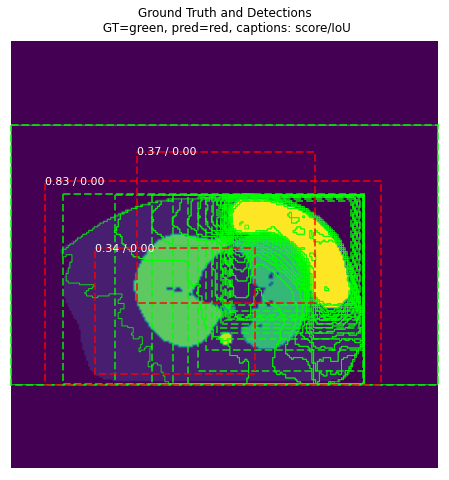

In [67]:
image_id = random.choice(dataset_train.image_ids)
info = dataset_train.image_info[image_id]

image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset_train, inference_config, image_id, use_mini_mask=False)

print("Original image shape: ", modellib.parse_image_meta(image_meta[np.newaxis,...])["original_image_shape"][0])

# Run object detection
results = model.detect_molded(np.expand_dims(image, 0), np.expand_dims(image_meta, 0), verbose=1)

# Display results
r = results[0]
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

# Compute AP over range 0.5 to 0.95 and print it
utils.compute_ap_range(gt_bbox, gt_class_id, gt_mask,
                       r['rois'], r['class_ids'], r['scores'], r['masks'],
                       verbose=1)

visualize.display_differences(
    image,
    gt_bbox, gt_class_id, gt_mask,
    r['rois'], r['class_ids'], r['scores'], r['masks'],
    dataset_train.class_names, ax=get_ax(),
    show_box=True, show_mask=False,
    iou_threshold=0.1, score_threshold=0.1)
 

Number of instances N = 3
(1024, 1024, 1)


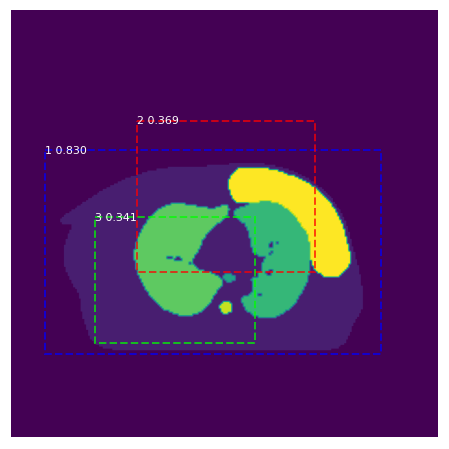

In [68]:
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset_val.class_names, r['scores'], ax=get_ax(), show_mask=False)

In [55]:
# Compute VOC-Style mAP @ IoU=0.5
# Running on 30 images. Increase for better accuracy.
image_ids = np.random.choice(dataset_val.image_ids, 30)

APs = []
for image_id in image_ids:
    # Load image and ground truth data
    image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        modellib.load_image_gt(dataset_val, inference_config,
                               image_id, use_mini_mask=False)
    molded_images = np.expand_dims(modellib.mold_image(image, inference_config), 0)
    # Run object detection
    results = model.detect([image], verbose=0)
    r = results[0]
    # Compute AP
    AP, precisions, recalls, overlaps =\
        utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                         r["rois"], r["class_ids"], r["scores"], r['masks'])
    APs.append(AP)
    
print("mAP: ", np.mean(APs))


mAP:  0.0
